# Measurment of ERROR spectrum

L. Ravera

December 20, 2022

This notebook checks some analysis methods to characterize the spectrum of the ERROR signal
on the DRE DEMUX DM.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('Qt5Agg')

In [8]:
# Input signal
 
from numpy import random

npts = 2**24
fsampling = 125e6
fsine = fsampling/8
t = np.arange(npts)/fsampling
f = np.arange(int(npts/2))*fsampling/npts
sig = random.randn(npts)+1*np.sin(2.*np.pi*fsine*t)


In [9]:
# Computing spectrum
def spectrum(sig):
    return(20*np.log10(abs(np.fft.fft(sig)[:int(len(sig)/2)])))


In [10]:
# Filtering the signal

from scipy import signal
sos = signal.butter(15, 20e6, 'lp', fs=125e6, output='sos')
sig_filt = signal.sosfilt(sos, sig)


In [11]:
# Proposed analysis
# Picking up series of measurements

slice_size = 64
ratio = 128
nb_slices = int(npts/(ratio*slice_size))

t2 = np.zeros(slice_size*nb_slices)
sig2 = np.zeros(slice_size*nb_slices)

for slice in range(nb_slices):
    #print(slice)
    #print(slice*slice_size, (slice+1)*slice_size)
    #print(slice*slice_size*ratio, slice*slice_size*ratio+slice_size)
    t2[slice*slice_size:(slice+1)*slice_size]=t[slice*slice_size*ratio:slice*slice_size*ratio+slice_size]
    sig2[slice*slice_size:(slice+1)*slice_size]=sig_filt[slice*slice_size*ratio:slice*slice_size*ratio+slice_size]

f2 = np.arange(int(npts/(2*ratio)))*fsampling/(npts/(ratio))


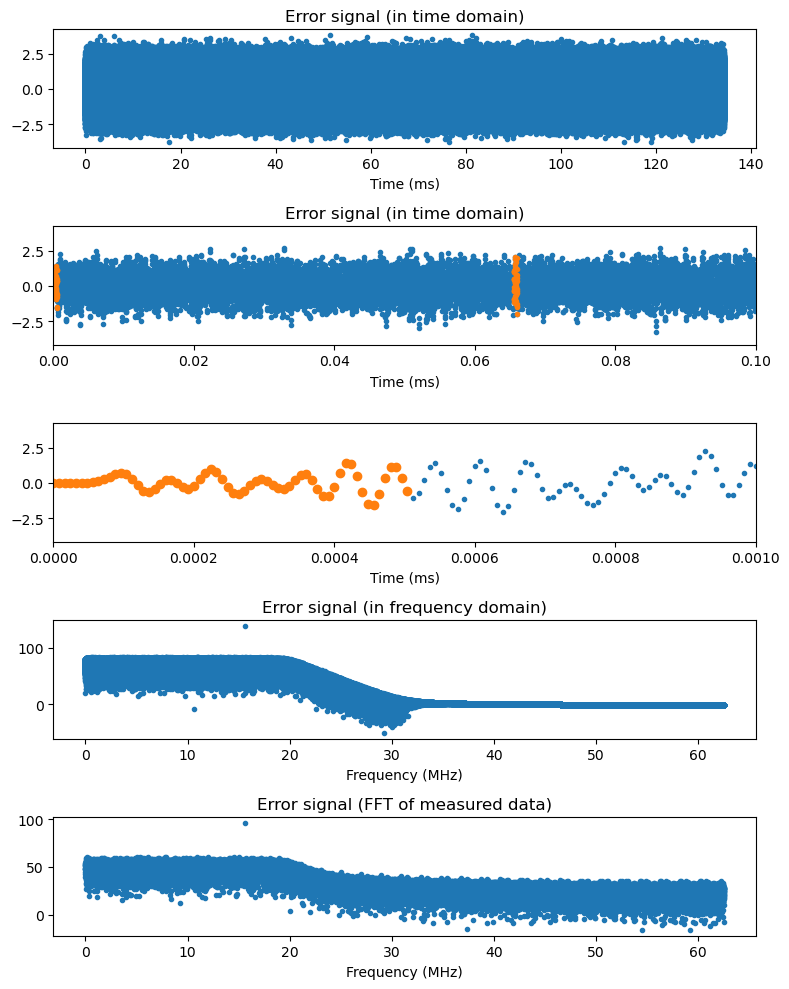

In [12]:
# Making the plot

fig=plt.figure(1,(8,10))

npicts = 5
pict=0

pict+=1
ax1=fig.add_subplot(npicts,1,pict)
ax1.plot(t*1e3, sig_filt, '.')
ax1.set_xlabel('Time (ms)')
ax1.set_title('Error signal (in time domain)')

pict+=1
ax2=fig.add_subplot(npicts,1,pict)
ax2.plot(t*1e3, sig_filt, '.')
ax2.plot(t2*1e3, sig2, '.')
ax2.set_xlabel('Time (ms)')
ax2.set_xlim([0,0.1])
ax2.set_title('Error signal (in time domain)')

pict+=1
ax5=fig.add_subplot(npicts,1,pict)
ax5.plot(t*1e3, sig_filt, '.')
ax5.plot(t2*1e3, sig2, 'o')
ax5.set_xlim([0,0.001])
ax5.set_xlabel('Time (ms)')

#pict+=1
#ax2=fig.add_subplot(npicts,1,pict)
#ax2.plot(f*1e-6, spectrum(sig))
#ax2.set_xlabel('Frequency (MHz)')

pict+=1
ax3=fig.add_subplot(npicts,1,pict)
ax3.plot(f*1e-6, spectrum(sig_filt), '.')
ax3.set_xlabel('Frequency (MHz)')
ax3.set_title('Error signal (in frequency domain)')

pict+=1
ax4=fig.add_subplot(npicts,1,pict)
ax4.plot(f2*1e-6, spectrum(sig2), '.')
ax4.set_xlabel('Frequency (MHz)')
ax4.set_title('Error signal (FFT of measured data)')

fig.tight_layout()
